# Simple linear regression

In [3]:
# 1. Read the dataset
# 2. EDA , FE
# 3. Divide our dataset into independent and dependent features
# 4. Further divide the dataset into train and test
# 5. standart Scaling on the train and test data
# 6. model traning


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

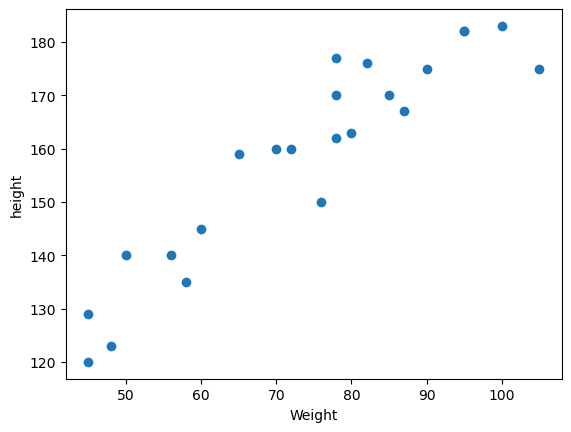

In [22]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")

In [23]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [25]:
df.describe

<bound method NDFrame.describe of     Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160>

In [26]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [27]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [28]:
## 3. Divide our dataset into independent and dependent features
x = df[['Weight']]  ## indenpendent variable
y = df['Height']   ## dependent variable

In [29]:
x.shape ,y.shape

((23, 1), (23,))

In [30]:
y.shape

(23,)

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
 x_train.shape , x_test.shape

((18, 1), (5, 1))

In [34]:
y_train.shape, y_test.shape

((18,), (5,))

In [7]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [37]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

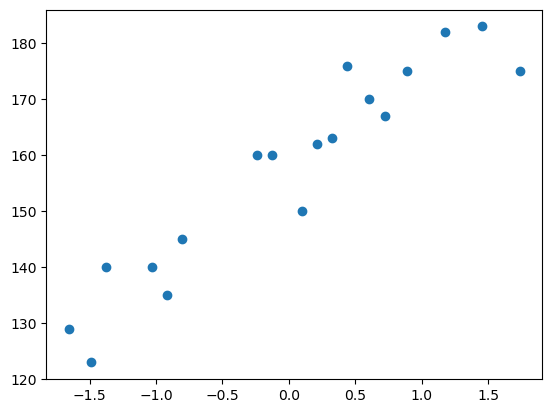

In [38]:
plt.scatter(x_train,y_train)

In [51]:
scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [52]:
## model training
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression()

In [54]:
## Training the train data
regressor.fit(x_train,y_train)

LinearRegression()

In [57]:
regressor.intercept_,regressor.coef_

(157.5, array([17.03440872]))

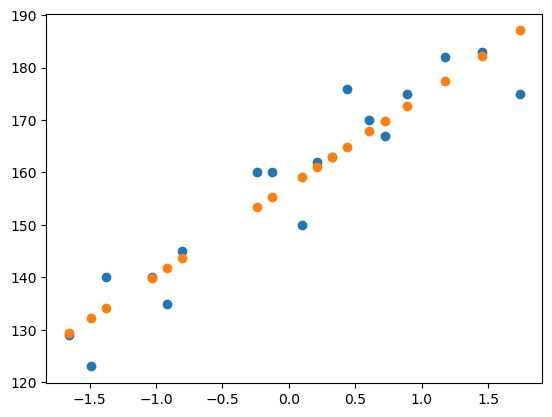

In [59]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regressor.predict(x_train))

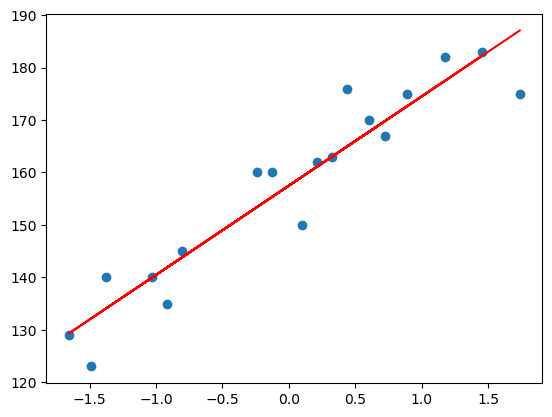

In [60]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

# prediction of train data
    1. predicted height output= intercept +coef_(Weights)
    2. y_pred_train =157.5 + 17.03(X_train)
# prediction of test data
    1. predicted height output= intercept +coef_(Weights)
    2. y_pred_test =157.5 + 17.03(X_test)

In [62]:
## prediction fortest data
y_pred_test =  regressor.predict(x_test)

In [63]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [64]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Performance metrics MAE,MSE,RMSE,R**2

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r squared
#  R square
Formula

R^2 = 1 - SSR/SST

R^2 = Accuracy of the model

SSR = sum of squares of residuals

SST = total sum of squares

In [68]:
from sklearn.metrics import r2_score



In [69]:
score = r2_score(y_test,y_pred_test)
score

0.776986986042344

## Adjusted r square
Formula
- Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

  where:

- R2: The R2 of the model

- n: The number of observations

- k: The number of predictor variables

In [70]:
## Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [71]:
scaler

StandardScaler()

In [96]:
regressor

LinearRegression()

## Multiple Linear Regression

In [85]:
from sklearn.datasets import fetch_california_housing

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [91]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [93]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [95]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [99]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [100]:
california.data.shape

(20640, 8)

In [102]:
california.target_names

['MedHouseVal']

In [103]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [104]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [105]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [107]:
## Lets prepare the dataset
dataset = pd.DataFrame(california.data,columns = california.feature_names)
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [108]:
dataset['Price'] = california.target

In [109]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [112]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [113]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [114]:
dataset.corr()   ##  it is a pearson correlation. 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

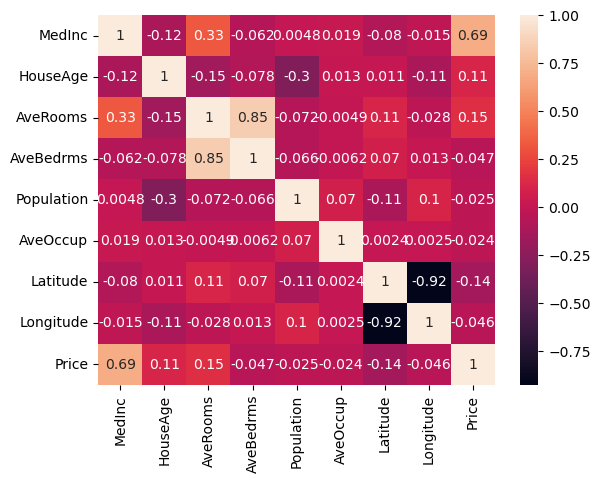

In [115]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot = True)

In [116]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [117]:
##  independent and dependent featuresx  
x = dataset.iloc[:,:-1]  ## independent features
y = dataset.iloc[:,-1]  ## dependent features


In [118]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [119]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [120]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)


In [122]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [144]:
x_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [145]:
x_test_scaled

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

## Model training 

In [130]:
from sklearn.linear_model import LinearRegression

In [134]:
regression = LinearRegression()

In [135]:
regression

LinearRegression()

In [137]:
regression.fit(x_train,y_train)

LinearRegression()

In [138]:
regression.coef_

array([ 4.39195877e-01,  9.75351300e-03, -1.11373429e-01,  7.50549844e-01,
        1.87306527e-06, -4.00869794e-03, -4.34300887e-01, -4.46085245e-01])

In [139]:
regression.intercept_

-37.9835724771854

In [140]:
regression.intercept_

-37.9835724771854

In [146]:
## prediction
y_pred_test = regression.predict(x_test_scaled)
y_pred_test

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-37.61052201, -37.70202531, -37.80960629, ..., -37.71585856,
       -37.89207088, -38.08661585])

In [147]:
### performance metrics cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))


1605.960909842127
40.06001144903095
40.07444210269342


In [148]:
## R square and Adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)


-1180.8723087498452


In [149]:
## Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-1182.2621336021161

### Pickling
Python pickle module is used for serializing and de-serializing a Python object structure. 
Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the
object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 
The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [10]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regressor.pkl','wb'))

NameError: name 'scaler' is not defined

In [11]:
model_regressor = pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(x_test_scaled)

FileNotFoundError: [Errno 2] No such file or directory: 'regressor.pkl'